# Analysis and Time Series Forecasting of Energy Consumption

This report contains descriptive analytics and univariate time series forecasting of the [Household Power Consumption Dataset](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption). This dataset describes electricity consumption for a single household over four years, including energy measurements taken for every minute between 12-16-2006 and 12-11-2010.


## Goals

The focus of this analysis will be on **global_active_power:** the total active power consumed by the household (kilowatts).

### Visualization
* Perform descriptive analytics on the global_active_power variable
* Plot time series of global_active_power over the entire four year timeframe
* Plot average monthly global active power
* Plot typical daily consumption by month
* Plot global active power 

### Forecasting 
Apply and evaluate the following forecasting methods to the global_active_power time series:
* Linear Regression (perfomed as an exercise)
* Seasonal AutoRegressive Integrated Moving Average (SARIMA)
* Prophet Forecasting Procedure

## Get Data
The following libraries will be used for dataframes, visualization, and machine learning.

In [8]:
import config as config

In [13]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly as py #pip install plotly
import plotly.graph_objs as go
from scipy import stats
from fbprophet import Prophet #pip install fbprophet
import warnings
warnings.filterwarnings('ignore')
py.tools.set_credentials_file(username=config.plotly['username'], api_key=config.plotly['api_key'])

The household_power_consumption file was quite large, so I stored it in my github repository using Large File Storage (LFS). The next step is to assign data types to each variable within the dataset. Approximately 1% of the dataset has missing values, so this is addressed with a forward fill.

In [14]:
#Import data file
path = 'https://media.githubusercontent.com/media/mkivenson/Household-Power-Consumption/master/household_power_consumption.txt'

dtypes = {'Date': str,
          'Time': str,
          'Global_active_power': float,
          'Global_reactive_power': float,
          'Voltage': float,
          'Global_intensity': float,
          'Sub_metering_1': float,
          'Sub_metering_2': float,
          'Sub_metering_3': float}

#Deal with missing values
energy = pd.read_csv(path, sep=';',dtype=dtypes, na_values="?")
energy = energy.fillna(method='ffill')

Some additional data preparation steps include adding a datetime formatted column as well as the following time summary columns: Year, Month, Day, and Hour. Finally, unnecessary columns are removed from the dataset. Now that the preliminary cleanup is complete, we can take a preview of the resulting dataframe below.

In [15]:
#Insert additional columns
energy.insert(0, 'Date_Time', pd.to_datetime(energy['Date'] + ' ' + energy['Time'])) #datetime format
energy.insert(2, 'Year',energy['Date_Time'].dt.year) #year
energy.insert(3, 'Month',energy['Date_Time'].dt.month) #month
energy.insert(4, 'Day',energy['Date_Time'].dt.weekday) #weekday_name
energy.insert(5, 'Hour',energy['Date_Time'].dt.hour) #hour

#Exclude other numerical variables (univariate analysis)
energy = energy.iloc[:,0:8]

#Preview data
energy.head()

,Date_Time,Date,Year,Month,Day,Hour,Time,Global_active_power
0,2006-12-16 17:24:00,16/12/2006,2006,12,5,17,17:24:00,4.216
1,2006-12-16 17:25:00,16/12/2006,2006,12,5,17,17:25:00,5.360
2,2006-12-16 17:26:00,16/12/2006,2006,12,5,17,17:26:00,5.374
3,2006-12-16 17:27:00,16/12/2006,2006,12,5,17,17:27:00,5.388
4,2006-12-16 17:28:00,16/12/2006,2006,12,5,17,17:28:00,3.666


## Explore and Visualize Series

### Descriptive Analysis

This section will provide an overview of the Global_active_power distribution and how it behaves over time.

**Distributions**

First, we can summarize at the variable of interest, Global_active_power. Based on the mean (1.09) and median (0.6) values shown in the variable description, it appears that the power consumption is strongly left skewed. We can take a closer look at the distribution of this variable by plotting a histogram and a boxplot.

In [16]:
np.round(energy['Global_active_power'].describe(), 2).apply(lambda x: format(x, 'f'))

count    2075259.000000
mean           1.090000
std            1.050000
min            0.080000
25%            0.310000
50%            0.600000
75%            1.520000
max           11.120000
Name: Global_active_power, dtype: object

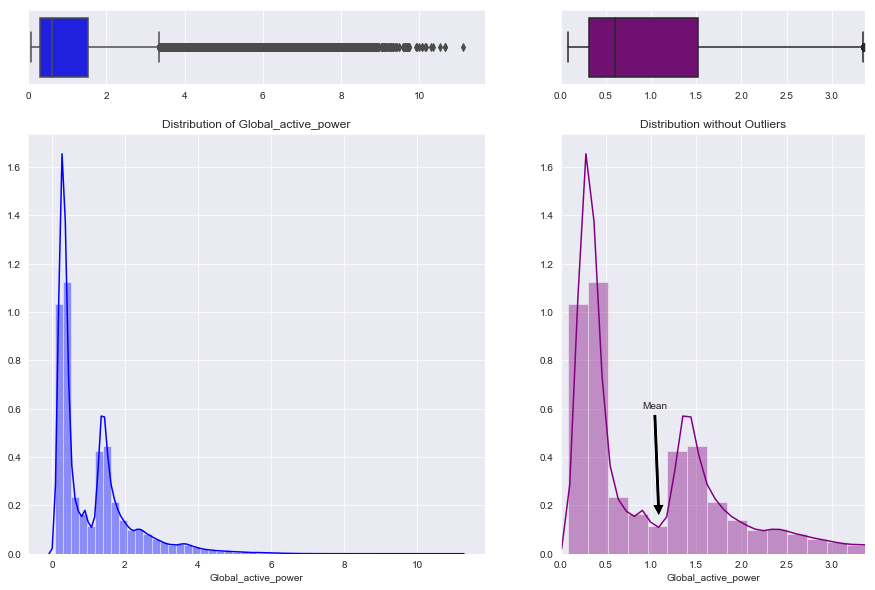

In [146]:
# Create subplots
f, axes = plt.subplots(2,
                       2, 
                       figsize=(15, 10), 
                       sharex=False, 
                       gridspec_kw={"height_ratios": (.15, .85),"width_ratios":(.60,.40)})
#Main boxplot
sns.boxplot(energy["Global_active_power"] , color="blue", ax=axes[0,0])
axes[0,0].set_xlabel('')
axes[0,0].set_xlim(0, None)

#Main distribution
sns.distplot(energy["Global_active_power"] , color="blue", ax=axes[1,0])
axes[0,0].set_xlim(0, None)
axes[1,0].set_title('Distribution of Global_active_power')

#Zoom boxplot
sns.boxplot(energy["Global_active_power"], color="purple", ax=axes[0,1])
axes[0,1].set_xlabel('')
axes[0,1].set_xlim(0, 3.37)

#Zoom distribution
sns.distplot(energy["Global_active_power"], color="purple", ax=axes[1,1])
axes[1,1].set_title('Distribution without Outliers')
axes[1,1].set_xlim(0, 3.37)

# Add an arrow to mark the mean value
axes[1,1].annotate(
'Mean', xy=(energy["Global_active_power"].mean(), .15), xytext=(.9, .6),
arrowprops=dict(facecolor='black', shrink=0.01))

plt.show()